<a href="https://colab.research.google.com/github/faizansid77/MSE313_project/blob/master/MSE313_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import numpy as np
from matplotlib import pyplot as plt
import random
import queue

In [0]:
size_r = 45
size_c = 45
size_vac = 10
last_plane = (size_r - size_vac - 1, int(size_c/2.0))

In [240]:
lat = np.zeros((size_r, size_c), dtype=int)
lat[last_plane[0]:, last_plane[1]] = 2 # empty cells
lat[:last_plane[0], last_plane[1]] = 1 # half plane
vac = np.random.randint(0, size_r), np.random.randint(0, size_c)
lat[vac] = -1
print(vac)

(36, 30)


In [0]:
def display(lat):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    ax.imshow(lat, origin='upper')

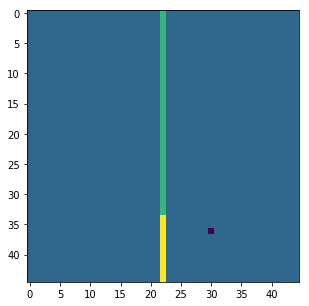

In [242]:
display(lat)

In [0]:
class RRT:
    class Node:
        def __init__(self, x, y):
            self.x = x
            self.y = y
            self.path_x = []
            self.path_y = []
            self.parent = None

    def __init__(self, start, goal, grid,
                 expand_dis=1, goal_sample_rate=5, max_iter=2000):
        self.start = self.Node(start[0], start[1])
        self.end = self.Node(goal[0], goal[1])
        self.grid = grid
        self.expand_dis = expand_dis
        self.goal_sample_rate = goal_sample_rate
        self.max_iter = max_iter
        self.node_list = []
        self.final_path = []

    def swap(self, p1, p2):
        temp = self.grid[p1[0], p1[1]]
        self.grid[p1[0], p1[1]] = self.grid[p2[0], p2[1]]
        self.grid[p2[0], p2[1]] = temp

    def movement(self):
        for i in range(len(self.final_path)-1):
            self.swap(self.final_path[i], self.final_path[i+1])

    def planning(self):
        self.node_list = [self.start]
        for i in range(self.max_iter):
            rnd_node = self.get_random_node()
            nearest_ind = self.get_nearest_node_index(self.node_list, rnd_node)
            nearest_node = self.node_list[nearest_ind]

            new_node = self.steer(nearest_node, rnd_node, self.expand_dis)

            if self.check_collision(new_node, self.grid):
                self.node_list.append(new_node)
                
            if self.calc_dist_to_goal(self.node_list[-1].x, self.node_list[-1].y) == self.expand_dis:
                final_node = self.steer(self.node_list[-1], self.end, self.expand_dis)
                if self.check_collision(final_node, self.grid):
                    self.final_path = self.generate_final_course(len(self.node_list) - 1)
                    return

        self.final_path = None  # cannot find path

    def steer(self, from_node, to_node, extend_length):

        new_node = self.Node(from_node.x, from_node.y)
        d, theta = self.calc_distance_and_angle(new_node, to_node)

        new_node.path_x = [new_node.x]
        new_node.path_y = [new_node.y]

        if math.radians(-45) <= theta < math.radians(45):
            dir_x = 1
            dir_y = 0
        elif math.radians(45) <= theta < math.radians(135):
            dir_x = 0
            dir_y = 1
        elif math.radians(135) <= theta < math.radians(225):
            dir_x = -1
            dir_y = 0
        else:
            dir_x = 0
            dir_y = -1
        new_node.x += dir_x
        new_node.y += dir_y

        new_node.path_x.append(to_node.x)
        new_node.path_y.append(to_node.y)

        new_node.parent = from_node

        return new_node

    def generate_final_course(self, goal_ind):
        path = [[self.end.x, self.end.y]]
        node = self.node_list[goal_ind]
        while node.parent is not None:
            path.append([node.x, node.y])
            node = node.parent
        path.append([node.x, node.y])

        return path

    def calc_dist_to_goal(self, x, y):
        dx = x - self.end.x
        dy = y - self.end.y
        return math.sqrt(dx ** 2 + dy ** 2)

    def get_random_node(self):
        if random.randint(0, 100) > self.goal_sample_rate:
            rnd = self.Node(int(random.uniform(0, self.grid.shape[0])),
                            int(random.uniform(0, self.grid.shape[1])))
        else:  # goal point sampling
            rnd = self.Node(self.end.x, self.end.y)
        return rnd

    @staticmethod
    def get_nearest_node_index(node_list, rnd_node):
        dlist = [(node.x - rnd_node.x) ** 2 + (node.y - rnd_node.y)
                 ** 2 for node in node_list]
        minind = dlist.index(min(dlist))

        return minind

    @staticmethod
    def check_collision(node, grid):
        for i in range(len(node.path_x)):
            if grid[node.path_x[i], node.path_y[i]] == 1 or grid[node.path_x[i], node.path_y[i]] == 2:
                return False

        return True  # safe

    @staticmethod
    def calc_distance_and_angle(from_node, to_node):
        dx = to_node.x - from_node.x
        dy = to_node.y - from_node.y
        d = math.sqrt(dx ** 2 + dy ** 2)
        theta = math.atan2(dy, dx)
        return d, theta

In [0]:
lat[last_plane[0], last_plane[1]] = 3 # last half plane cell
rrt = RRT(start=last_plane, goal=vac, grid=lat)
rrt.planning()
rrt.movement()
lat_mov = rrt.grid
for i in range(size_r):
    for j in range(size_c):
        if lat[i, j] == 3:
            lat[i, j] = 1

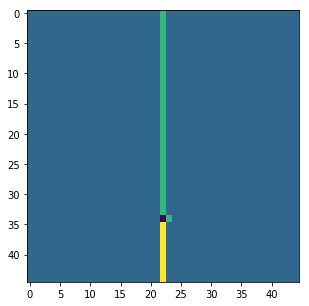

In [245]:
display(lat_mov)

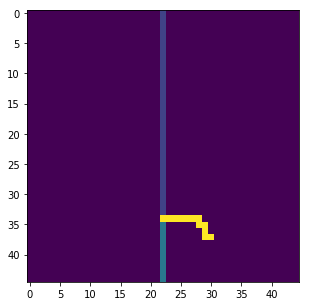

In [246]:
path_disp = np.copy(lat_mov)
for i in path:
    path_disp[i[0], i[1]] = 5
display(path_disp)